In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
data=pd.read_csv('review_test.csv')

In [48]:
data.tail(5)

,Text,Score,Sentiment
3702,I always have Powerade in the house - for ever...,5,1
3703,I tried this coffee on a half dozen quests thi...,5,1
3704,The Neccos were exactly what I expected and fr...,5,1
3705,I thought I was doing the right thing by getti...,1,0
3706,Cugino's chicken noodle soup is pretty tasty. ...,5,1


In [49]:
data.shape

(3707, 3)

In [50]:
data.isnull().sum()

Text         0
Score        0
Sentiment    0
dtype: int64

In [51]:
data['Sentiment'].value_counts()

Sentiment
1    3115
0     592
Name: count, dtype: int64

our dataset is highly imbalanced ,so we need to balance it

In [52]:
data['Length']=data['Text'].apply( lambda x: len(x))

In [53]:
data.rename({'Length':'char_count'},inplace=True,axis=1)

In [54]:
data.head()

,Text,Score,Sentiment,char_count
0,"IF YOU LOVE THE TASTE OF LOBSTER,YOU MUST ORDE...",5,1,337
1,We are so pleased with this diaper ointment; o...,5,1,273
2,I like chewing this after meals since I don't ...,5,1,212
3,And here I thought I could only get this spice...,5,1,305
4,"I'm a huge skeptic, but after 6 months of dail...",5,1,1519


In [55]:
data['word_count']=data['Text'].apply(lambda x:len(x.split()))

In [56]:
data.head()

,Text,Score,Sentiment,char_count,word_count
0,"IF YOU LOVE THE TASTE OF LOBSTER,YOU MUST ORDE...",5,1,337,48
1,We are so pleased with this diaper ointment; o...,5,1,273,46
2,I like chewing this after meals since I don't ...,5,1,212,39
3,And here I thought I could only get this spice...,5,1,305,55
4,"I'm a huge skeptic, but after 6 months of dail...",5,1,1519,277


In [57]:
import nltk

In [58]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DASARADHA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [59]:
data['sent_count']=data['Text'].apply(lambda x:len(nltk.sent_tokenize(str(x))))

In [60]:
data.head()

,Text,Score,Sentiment,char_count,word_count,sent_count
0,"IF YOU LOVE THE TASTE OF LOBSTER,YOU MUST ORDE...",5,1,337,48,1
1,We are so pleased with this diaper ointment; o...,5,1,273,46,2
2,I like chewing this after meals since I don't ...,5,1,212,39,3
3,And here I thought I could only get this spice...,5,1,305,55,1
4,"I'm a huge skeptic, but after 6 months of dail...",5,1,1519,277,17


In [61]:
data[data['Sentiment'] ==1]['char_count'].mean()

413.2337078651685

In [62]:
data[data['Sentiment'] ==0]['char_count'].mean()

504.9408783783784

negative reviews have higher average length compared to positive reviews

In [63]:
data[data['Sentiment']==1]['sent_count'].mean()

4.868057784911717

In [64]:
data[data['Sentiment']==0]['sent_count'].mean()

5.525337837837838

negative reviews have higher average sentences when compared to positive reviews

In [65]:
import re

In [66]:
data['Text']=data['Text'].apply(lambda x:re.sub('[^a-zA-Z]'," ",x))

In [67]:
data.head()

,Text,Score,Sentiment,char_count,word_count,sent_count
0,IF YOU LOVE THE TASTE OF LOBSTER YOU MUST ORDE...,5,1,337,48,1
1,We are so pleased with this diaper ointment o...,5,1,273,46,2
2,I like chewing this after meals since I don t ...,5,1,212,39,3
3,And here I thought I could only get this spice...,5,1,305,55,1
4,I m a huge skeptic but after months of dail...,5,1,1519,277,17


In [68]:
data[data['char_count']<100]['Text']

12      This just tastes like sweet milk   I did not c...
21      Just small enough  but not too big for my dog ...
27      Best granola cereal I ve ever eaten   You don ...
34      The price is excellent  but the shipping is to...
68      Good brown sticky rice   Seems very fresh  Tha...
                              ...                        
3553    Most products are cheaper on Amazon  this is t...
3631    My doggies love these treats   I was very sati...
3641    These are the best things that I have ever fou...
3671    If you like cracked pepper this is definitely ...
3677    This product helps keep my mood up during stre...
Name: Text, Length: 105, dtype: object

In [69]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DASARADHA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [70]:
from nltk.corpus import stopwords
all_stopwords=stopwords.words('english')
all_stopwords.remove('not')

In [71]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [72]:
custom_stopwords= {'don', "don't", 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', "mightn", "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'no', 'nor', 'not', 'shouldn', "shouldn't", 'wasn', "wasn't",'weren', "weren't", 'won', "won't", "wouldn", "wouldn't"}

In [73]:
print(custom_stopwords)

{'no', "doesn't", "shouldn't", 'weren', "isn't", 'ain', 'wouldn', 'mightn', "won't", 'wasn', 'won', 'nor', "wouldn't", 'isn', 'not', 'hadn', 'needn', "weren't", 'mustn', "hadn't", 'don', "needn't", "mightn't", "shan't", 'aren', 'ma', "couldn't", "hasn't", 'haven', 'shouldn', "haven't", "aren't", 'hasn', 'doesn', "didn't", 'didn', 'shan', 'couldn', "wasn't", "mustn't", "don't"}


In [74]:
stop_words=set(all_stopwords)-custom_stopwords

In [75]:
type(str(data['Text'][0]))

str

In [76]:
corpus=[]
for i in range(len(data)):
  text=re.sub('[^a-zA-Z]',' ',str(data['Text'][i]))
  text=text.lower()
  text=text.split()
  text=[i for i in text if i not in stop_words]
  text=" ".join(text)
  corpus.append(text)


In [77]:
corpus[0]

'love taste lobster must order fresh cooked maine lobster without bother cracking lobster product tastes fresh absolutely delicious ordered companies lobster meat far best definitly reorder e rich hallandale beach florida'

In [78]:
data['processed_text']=corpus

In [79]:
data.head()

,Text,Score,Sentiment,char_count,word_count,sent_count,processed_text
0,IF YOU LOVE THE TASTE OF LOBSTER YOU MUST ORDE...,5,1,337,48,1,love taste lobster must order fresh cooked mai...
1,We are so pleased with this diaper ointment o...,5,1,273,46,2,pleased diaper ointment daughter never diaper ...
2,I like chewing this after meals since I don t ...,5,1,212,39,3,like chewing meals since don feel like brushin...
3,And here I thought I could only get this spice...,5,1,305,55,1,thought could get spice heb san antonio sent f...
4,I m a huge skeptic but after months of dail...,5,1,1519,277,17,huge skeptic months daily use agree stuff nece...


In [80]:
from wordcloud import WordCloud
#pip install wordcloud

In [81]:
wc=WordCloud(width=500,height=500,min_font_size=8,background_color='white')

In [82]:
pos=wc.generate(data[data['Sentiment']==1]['processed_text'].str.cat(sep=" "))

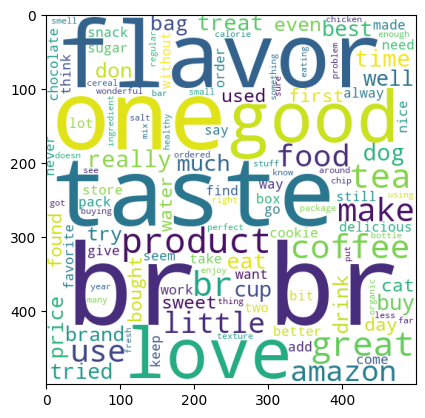

In [83]:
plt.imshow(pos)

In [84]:
negative=wc.generate(data[data['Sentiment']==1]['processed_text'].str.cat(sep=" "))

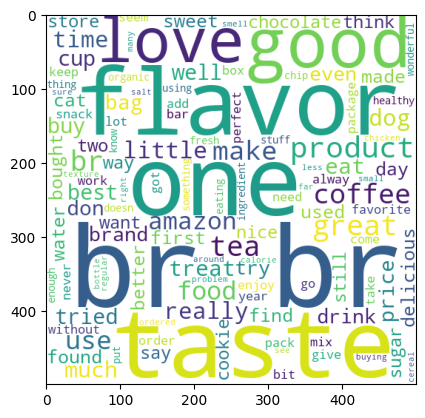

In [85]:
plt.imshow(negative)

In [86]:
from sklearn.feature_extraction.text import CountVectorizer

In [87]:
cv=CountVectorizer(max_features=2500)

In [88]:
x=cv.fit_transform(corpus).toarray()

In [89]:
x.shape

(3707, 2500)

In [90]:
y=data['Sentiment']

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [93]:
from sklearn.naive_bayes import GaussianNB

In [94]:
nb=GaussianNB()
nb.fit(x_train,y_train)
nb_y_pred=nb.predict(x_test)

In [95]:
from sklearn.metrics import accuracy_score
as1=accuracy_score(y_test,nb_y_pred)

In [96]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr_y_pred=lr.predict(x_test)

In [97]:
as2=accuracy_score(y_test,lr_y_pred)

In [98]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rf_y_pred=rf.predict(x_test)

In [99]:
as3=accuracy_score(y_test,rf_y_pred)

In [100]:
models=pd.DataFrame({
    'Model':['Naive Bayes','Logistic Regression','Random Forest'],
    'Accuracy':[as1,as2,as3]
})

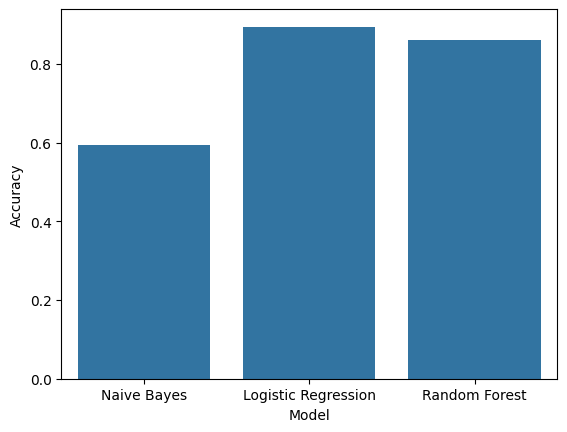

In [101]:
sns.barplot(x='Model',y='Accuracy',data=models)
plt.show()